In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

import matplotlib.pyplot as plt
import io
import base64
# Import os for file path management
import os
from IPython.display import HTML


In [3]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v3')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
new_step_api=True

In [4]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    #gym_super_mario_bros.make('SuperMarioBros-v0', render.modes='human')
    #env.render()
# Close the game
env.close()

/usr/local/lib/python3.7/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


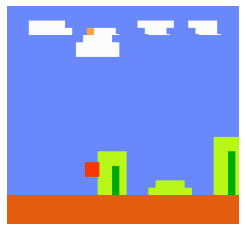

In [5]:
def render_as_image(env):
    plt.imshow(env.render(mode='rgb_array'))
    plt.axis('off')
    plt.show()

render_as_image(env)

In [6]:
# Install pytorch
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
tcmalloc: large alloc 1821458432 bytes == 0x3254000 @  0x7f91a12081e7 0x4b2590 0x5ad01c 0x5dcfef 0x58f92b 0x590c33 0x5e48ac 0x4d20fa 0x51041f 0x58fd37 0x50ca37 0x58fd37 0x50ca37 0x5b575e 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b575e 0x4bad0a 0x4d3249
tcmalloc: large alloc 1821458432 bytes == 0x6fb68000 @  0x7f91a12081e7 0x4b2590 0x5ad01c 0x64b047 0x4d22a6 0x51041f 0x58fd37 0x50ca37 0x58fd37 0x50ca37 0x5b575e 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b575e 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6
tcmalloc: large alloc 1821458432 bytes == 0xdc47c000 @  0x7f91a12081e7 0x4b2590 0x4d2812 0x5b83a5 0x5b8cc6 0x5b9fe6 0x4d222f 0x51041f 0x58fd37 0x

In [7]:
# Install stable baselines for RL stuff
!pip install stable-baselines3[extra]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.13.0-cp37-cp37m-manylinux1_x86_64.whl (890.2 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.10.1+cu113
    Uninstalling torch-1.10.1+cu113:
      Successfully uninstalled torch-1.10.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.2+cu113 requires torch==1.10.1, but you have torch 1.13.0 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.13.0 which is incompatible.
torchaudio 0.10.1+cu113 requires torch==1.10.1, but you have torch 1.13.0 which is incompatible.


In [8]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

from gym.wrappers import GrayScaleObservation
from gym import wrappers

In [9]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v3')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [10]:
state = env.reset()

In [11]:
state, reward, done, info = env.step([5])

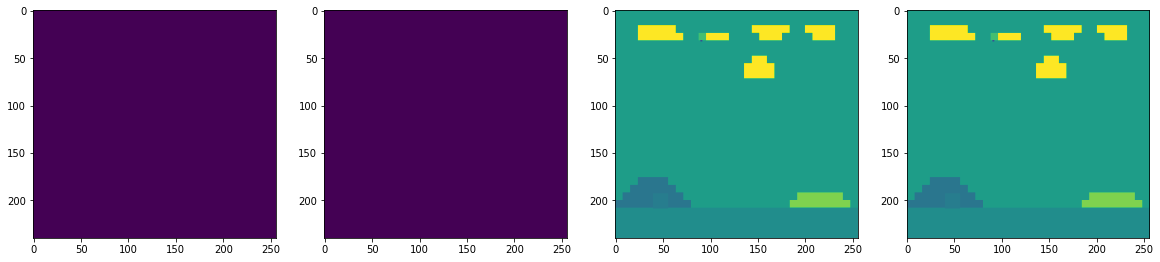

In [12]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [13]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [14]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [15]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [16]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [17]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/PPO_2


/usr/local/lib/python3.7/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 23  |
|    iterations      | 1   |
|    time_elapsed    | 21  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 33            |
|    iterations           | 2             |
|    time_elapsed         | 30            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.9305735e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00245      |
|    learning_rate        | 1e-06         |
|    loss                 | 80.3          |
|    n_updates            | 10            |
|    policy_gradient_loss | -1.56e-05     |
|    value_loss           | 287           |
-------------------------------------------
-----

In [18]:
model.save('Gabotero_Mario_Model')

In [19]:
# Load model
model = PPO.load('./train/best_model_100000')

In [20]:
state = env.reset()

In [21]:
env = gym_super_mario_bros.make('SuperMarioBros2-v0')
env = wrappers.Monitor(env, "./gym-results", force=True)
env.reset()
for _ in range(4000):
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if done: break
env.close()

/usr/local/lib/python3.7/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [22]:
video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))